# LAB Sheet-09: Logistic Regression

### Submitted by: Vatsalya Gupta, SC19B098, B.Tech. ECE VII Semester

Consider the log-likelihood function for logistic regression:

$$L(\theta)=\sum_{i=1}^m y^{(i)} \log h_\theta\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-h_\theta\left(x^{(i)}\right)\right)$$

For the following, you will need to calculate the value of the Hessian H of the above function.

(a) The files $\texttt{logisticX.csv}$ and $\texttt{logisticY.csv}$ contain the inputs $(x(i) \in R2)$ and outputs $(y^{(i)} \in {0, 1})$ respectively for a binary classification problem, with one training example per row. Implement Newton’s method for optimizing $L(\theta)$, and apply it to fit a logistic regression model to the data. Initialize Newton’s method with $\theta = \vec{0}$ (the vector of all zeros). What are the coefficients $\theta$ resulting from your fit? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_theme()
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
X = np.genfromtxt('logisticX.csv', delimiter = ',')
Y = np.genfromtxt('logisticY.csv', delimiter = '\n').reshape(-1,1)

In [3]:
mean = np.mean(X)
var = np.std(X)

X = X - mean  # mean of normalised data
X = X / var  # variance of normalised data

X = np.append(np.ones((X.shape[0], 1)), X, axis = 1)

In [4]:
theta = np.zeros((X.shape[1], 1))  # initialise theta with zeros

In [5]:
dist = np.dot(X, theta)
hypothesis = (1 / (1 + np.exp(-dist)))  # hypothesis for y

In [6]:
grad_loglike = np.dot(X.T, (hypothesis - Y))
I = np.identity(X.shape[0])  # identity matrix
diag = I * np.dot(hypothesis.T, (1 - hypothesis))
H = np.dot(X.T, np.dot(diag, X))  # hessian

In [7]:
theta_final = theta - np.dot(np.linalg.pinv(H), grad_loglike)  # converges in 1 step for linear and quadratic
print('Final Parameters:\n', theta_final)

Final Parameters:
 [[-0.00064394]
 [ 0.00921424]
 [-0.00898329]]


(b) Plot the training data (your axes should be $x_{1}$ and $x_{2}$ , corresponding to the two coordinates
of the inputs, and you should use a different symbol for each point plotted to indicate whether that
example had label 1 or 0). Also plot on the same figure the decision boundary fit by logistic regression.
(i.e., this should be a straight line showing the boundary separating the region where $h(x) > 0.5$ from
where $h(x) \le 0.5$.

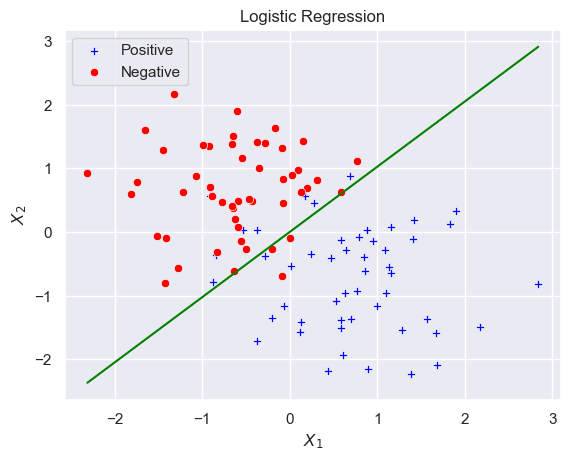

In [8]:
x_neg = np.array([X[i] for i in range(len(Y)) if Y[i] == 0])
x_pos = np.array([X[i] for i in range(len(Y)) if Y[i] == 1])
x_val = np.array([np.min(X[:, 1] ), np.max(X[:, 1] )]).reshape(1, -1)
y_val = np.dot((-1.0 / theta_final[2:3]), np.dot(theta_final[1:2], x_val)) - theta_final[0:1]

sns.scatterplot(x = x_pos[:, 1], y = x_pos[:, 2], color = 'blue', marker = 'P', label = 'Positive')
sns.scatterplot(x = x_neg[:, 1], y = x_neg[:, 2], color = 'red', marker = 'o', label = 'Negative')
sns.lineplot(x_val.ravel(), y_val.ravel(), color = 'green')

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Logistic Regression')
plt.legend()